# 4.10 TASK Part 1B

# Contents

    
    01. Importing Libraries
    02. Importing Data
    03. Customer Profiling
          Age
          Income
          Dependents
          Departments
    04. Exporting Data

# 01. Importing Libraries

In [2]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02. Importing data

In [3]:
# creating path for import

path = r'/Users/bdigregorio/Desktop/CareerFoundry/' \
r'Data Immersion/Data Immersion 4/DI 4.2/Instacart Basket Analysis'

In [4]:
#check path
path

'/Users/bdigregorio/Desktop/CareerFoundry/Data Immersion/Data Immersion 4/DI 4.2/Instacart Basket Analysis'

In [5]:
# importing a new Orders_products_all.pkl to be based on high activity customers

Orders_products_all_3 = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'high_active_customer.pkl'))


In [27]:
# checking import
Orders_products_all_3.head()

,user_id,first_name,last_name,gender,state,age,date_joined,number_of_dependents,family_status,income,...,busiest_days,Most orders,max_order,loyalty_flag,avg_spent,spender_type,median_order_days,customer_type,Region,customer_activity
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Fewest orders,9.0,New customer,7.988889,Low spender,20.0,Regular customer,Midwest,High_activity
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Most orders,9.0,New customer,7.988889,Low spender,20.0,Regular customer,Midwest,High_activity
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Most orders,9.0,New customer,7.988889,Low spender,20.0,Regular customer,Midwest,High_activity
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Fewest orders,9.0,New customer,7.988889,High spender,20.0,Regular customer,Midwest,High_activity
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Most orders,9.0,New customer,7.988889,High spender,20.0,Regular customer,Midwest,High_activity


In [6]:
# importing 'department' data for profiling
departments_wrangled = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'), index_col = False)


# TASK CONT'D 

# 03.  Customer Profiling
Task part 1 steps 5 and 6

In [29]:
# Task step 5: Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents.
# Task step 6: Create appropriate visuals to show distribution of profiles


In [30]:
# preparing Orders_products_all_3 and departments_wrangled merge

In [31]:
departments_wrangled

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [7]:
# renamimng column 'Unnamed: 0' to 'department_id'
departments_wrangled.rename(columns = {'Unnamed: 0':'department_id'},inplace = True)

In [33]:
departments_wrangled

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [8]:
# merge Orders_products_all_3 with deprtments_wrangled
Opa = Orders_products_all_3.merge(departments_wrangled, on = ['department_id'], indicator = True)


In [ ]:
Opa.info()

# Age

In [ ]:
Opa['age'].value_counts()

In [ ]:
Opa['age'].describe()

In [ ]:
Opa['age'].max()

The average age is 50,
The minimun age is 18,
The max age is 80

1st quartile is age 18 to 33,
2nd quartile is age 33 to 65,
3rd quartile is age 65 to 85

In [9]:
# creating age group flags
Opa.loc[Opa['age'] >= 65, 'age_group'] = 'Older customer'

In [10]:
Opa.loc[(Opa['age'] >= 34) &  (Opa['age'] <= 64), 'age_group'] = 'Middle age'

In [11]:
Opa.loc[(Opa['age'] >= 18) &  (Opa['age'] <= 34), 'age_group'] = 'Young adult'

In [12]:
Opa['age_group'].value_counts(dropna = False)

Middle age        14892924
Young adult        8451744
Older customer     8402256
Name: age_group, dtype: int64

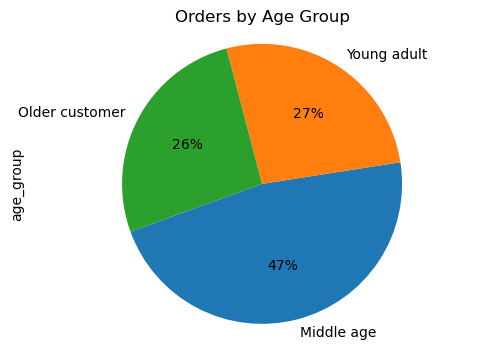

In [13]:
plt.figure(figsize=(6, 4))
pie_age_groups = Opa['age_group'].value_counts().plot.pie(autopct='%1.0f%%', startangle=200,)
plt.axis('equal')
plt.title('Orders by Age Group')

plt.show()

In [14]:
# exporting pie_age_groups
pie_age_groups.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_age_group.png'))


# Income


In [ ]:
Opa['income'].describe()

This gives us quartiles on income. 

I will make 4 levels of based on these amounts
1st: income is 25,903 to 67,156. 2nd: 67,156 to 96,696. 3rd: 96,696 to 127,988 4th: >127,988

In [20]:
# creating income amount flags

Opa.loc[Opa['income'] >= 125000, 'income_level'] = 'High income'
Opa.loc[(Opa['income'] >= 96500) &  (Opa['income'] <= 124999), 'income_level'] = 'Upper-middle'
Opa.loc[(Opa['income'] >= 67000) &  (Opa['income'] <= 96499), 'income_level'] = 'Lower-middle'
Opa.loc[(Opa['income'] >= 25000) &  (Opa['income'] <= 66999), 'income_level'] = 'Lower'


In [ ]:
# check new column
Opa['income_level'].value_counts(dropna = False)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'High income'),
  Text(1, 0, 'Lower'),
  Text(2, 0, 'Lower-middle'),
  Text(3, 0, 'Upper-middle')])

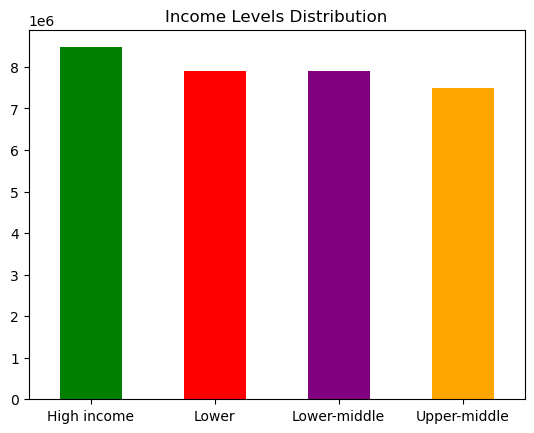

In [27]:
bar_income_level = Opa['income_level'].value_counts().sort_index().plot.bar(color = ['green', 'red', 'purple', 'orange'])
plt.title('Income Levels Distribution')
plt.xticks(rotation=0)

In [28]:
# exporting bar_income_level
bar_income_level.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_income_level.png'))

# Dependents

In [ ]:
Opa['family_status'].value_counts()

In [ ]:
Opa['number_of_dependents'].value_counts()

In [ ]:
# creating "dependents" column
Opa.loc[Opa['number_of_dependents']==0, 'dependents'] = 'NO dependents' 

In [ ]:
Opa.loc[Opa['number_of_dependents']!=0, 'dependents'] = 'HAS dependents' 

In [ ]:
Opa['dependents'].value_counts()

In [ ]:
plt.figure(figsize=(7, 4))
pie_Customers_with_dependents = Opa['dependents'].value_counts().plot.pie(autopct='%1.0f%%', startangle=200,
 colors= ['green', 'orange'])
plt.axis('equal')
plt.title('Customers with dependents')
plt.show()

In [ ]:
# export pie_'Customer with dependents'

pie_Customers_with_dependents.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_Customers_with_dependents.png'))


# Department

In [ ]:
Opa['department'].value_counts()

In [ ]:
Opa.head()

In [ ]:
# Create a bar chart

bar_department_chart = Opa['department'].value_counts().plot.barh(color ='orange')
plt.title('Popularity of Department Orders')

In [ ]:
Opa['department'].value_counts(dropna = False)

In [ ]:
# exporting bar_Pop_of_dept
bar_department_chart.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_Pop_of_dept.png'))

# baby-product buyers

In [ ]:
Opa.loc[Opa['department_id']==18, 'baby_product_buyer'] = 'baby product buyer'
Opa.loc[Opa['department_id']!=18, 'baby_product_buyer'] = 'NOT a baby product buyer'

In [ ]:
Opa['baby_product_buyer'].value_counts()

In [ ]:
plt.figure(figsize=(9, 4))
pie_Buyers_of_baby_products = Opa['baby_product_buyer'].value_counts().plot.pie(autopct='%1.0f%%', startangle=0,
 colors= ['teal', 'orange'])
plt.axis('equal')
plt.title('Buyers of baby products')
plt.show()

In [ ]:
# export pie_'Buyers of baby products'

pie_Buyers_of_baby_products.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_Buyers_of_baby_products.png'))


# Age group orders by day

In [15]:
# profiling age group by orders_day_of-the_week
age_order_days =pd.crosstab(Opa['orders_day_of_the_week'], Opa['age_group'], dropna = False)

In [16]:
age_order_days

age_group,Middle age,Older customer,Young adult
orders_day_of_the_week,,,
0.0,2842470,1608359,1618400
1.0,2599649,1453259,1492941
2.0,1942564,1091546,1091494
3.0,1764399,1002881,997027
4.0,1739983,979172,992241
5.0,1937821,1091784,1098639
6.0,2066038,1175255,1161002


In [17]:
# rename days of the week


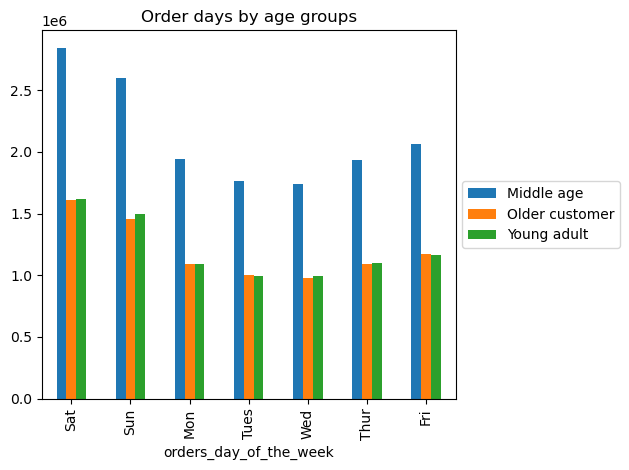

In [18]:
# create bar
bar_age_order_days = age_order_days.plot.bar()
plt.title('Order days by age groups')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# Define your new x-axis labels
new_labels = ['Sat', 'Sun', 'Mon','Tues', 'Wed', 'Thur', 'Fri']  # Replace with your desired labels

# Set the new x-axis labels
bar_age_order_days.set_xticklabels(new_labels)
plt.tight_layout()

In [19]:
# export bar_age_order_days'

bar_age_order_days.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_order_days.png'))

# Income level orders by day

In [24]:
# profiling income level by orders_day_of-the_week
income_order_days =pd.crosstab(Opa['orders_day_of_the_week'], Opa['income_level'], dropna = False)

In [49]:
income_order_days


income_level,High income,Lower,Lower-middle,Upper-middle
orders_day_of_the_week,,,,
0.0,1658619,1379714,1570557,1460339
1.0,1449434,1463307,1353878,1279230
2.0,1086209,1066499,1014470,958426
3.0,999423,964713,925092,875079
4.0,985476,950918,912864,862138
5.0,1086315,1062442,1006325,973162
6.0,1205246,1006534,1116463,1074052


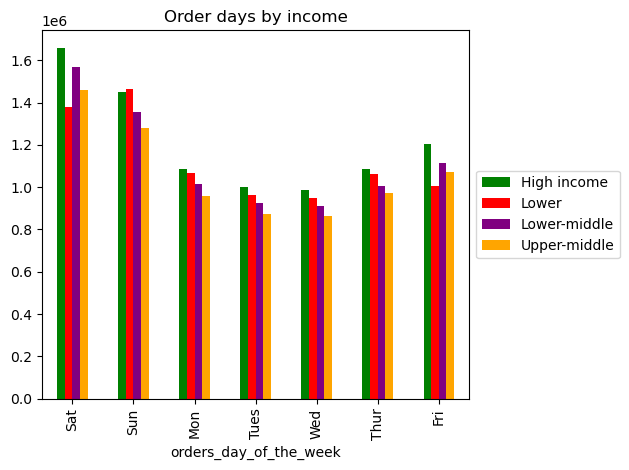

In [29]:
# create bar
bar_income_order_days = income_order_days.plot.bar(color = ['green', 'red', 'purple', 'orange'])
plt.title('Order days by income')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# Define your new x-axis labels
new_labels = ['Sat', 'Sun', 'Mon','Tues', 'Wed', 'Thur', 'Fri']  # Replace with your desired labels

# Set the new x-axis labels
bar_income_order_days.set_xticklabels(new_labels)
plt.tight_layout()

In [30]:
# export bar_income_order_days'

bar_income_order_days.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_income_order_days.png'))

# 04. Exporting data

In [52]:
Opa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31746924 entries, 0 to 31746923
Data columns (total 40 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   user_id                 int64   
 1   first_name              object  
 2   last_name               object  
 3   gender                  object  
 4   state                   object  
 5   age                     int64   
 6   date_joined             object  
 7   number_of_dependents    int64   
 8   family_status           object  
 9   income                  int64   
 10  order_id                float64 
 11  order_number            float64 
 12  orders_day_of_the_week  float64 
 13  order_hour_of_day       float64 
 14  days_since_prior_order  float64 
 15  product_id              float64 
 16  add_to_cart_order       float64 
 17  reordered               float64 
 18  product_name            object  
 19  aisle_id                float64 
 20  department_id           float64 
 21  prices

In [53]:
Opa.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'Opa.pkl'))

# End of Part 1B